In [ ]:
install.packages("tidyverse")
remotes::install_github("bradleyboehmke/harrypotter")
install.packages("tidytext")
library(tidyverse)
library(stringr)
options(jupyter.rich_display=T)
library(harrypotter)
library(tidytext)
options(repr.plot.width=4, repr.plot.height=3)

# STATS 306
## Homework 7: Text Analysis

For each problem, enter the R code in the cell marked "YOUR SOLUTION HERE".

## Problem 1: Sentiment Analysis (4 points)

In problem 1 we will perform *sentiment analysis* of the Harry Potter books. The file `afinn.RData` contains a sentiment score for a large number of words in the English language:

In [65]:
load(url("https://datasets.stats306.org/afinn.RData"))
head(afinn)

word,value
<chr>,<dbl>
abandon,-2
abandoned,-2
abandons,-2
abducted,-2
abduction,-2
abductions,-2


Negatively connoted words receive low scores, while positively connoted words receive high scores:

In [66]:
filter(afinn, word %in% c("death", "hurrah"))

word,value
<chr>,<dbl>
death,-2
hurrah,5


The `tidytext::unnest_tokens()` function can be used to break a chunk of text into "tokens" (words, sentences, etc.) It works as follows. Consider the following tibble, which contains all 17 chapters of the first book in the Harry Potter series:

In [67]:
phil_tbl <- tibble(chapter=seq_along(philosophers_stone), 
                   text=philosophers_stone) %>% print

# A tibble: 17 × 2
   chapter text                                                                 
     <int> <chr>                                                                
 1       1 "THE BOY WHO LIVED　　Mr. and Mrs. Dursley, of number four, Privet D…
 2       2 "THE VANISHING GLASS　　Nearly ten years had passed since the Dursle…
 3       3 "THE LETTERS FROM NO ONE　　The escape of the Brazilian boa constric…
 4       4 "THE KEEPER OF THE KEYS　　BOOM. They knocked again. Dudley jerked a…
 5       5 "DIAGON ALLEY　　Harry woke early the next morning. Although he coul…
 6       6 "THE JOURNEY FROM PLATFORM NINE AND THREE-QUARTERS　　Harry's last m…
 7       7 "THE SORTING HAT　　The door swung open at once. A tall, black-haire…
 8       8 "THE POTIONS MASTER　　There, look.\"　　\"Where?\"　　\"Next to the…
 9       9 "THE MIDNIGHT DUEL　　Harry had never believed he would meet a boy h…
10      10 "HALLOWEEN　　Malfoy couldn't believe his eyes when he saw that Harr…
11      11 "QUIDDITCH　　As they en

To perform sentiment analysis, we need to break each chapter into words so that we can join it to the `afinn` table. This is what `unnest_tokens()` does:

In [68]:
phil_tok <- unnest_tokens(phil_tbl, input=text, output=word) %>% print

# A tibble: 77,875 × 2
   chapter word   
     <int> <chr>  
 1       1 the    
 2       1 boy    
 3       1 who    
 4       1 lived  
 5       1 mr     
 6       1 and    
 7       1 mrs    
 8       1 dursley
 9       1 of     
10       1 number 
# … with 77,865 more rows


**1(a)** By joining this table to other tables containing text data and summarizing, we can generate scores of how positive or negative the text is. Using the table and `afinn`, we can assign sentiment scores to various portions of text. Generate a plot reflecting how the sentiment changes over 17 chapters of the first book in the Harry Potter series. What conclusion can you draw from the plot? (1 point)

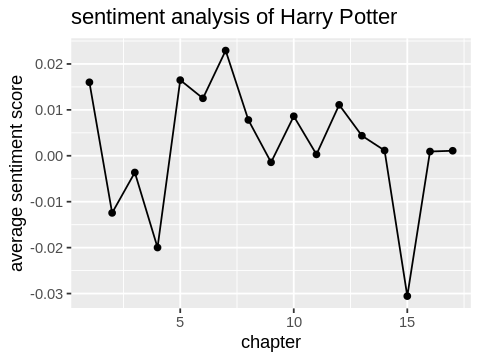

In [6]:
### YOUR SOLUTION HERE
phil_sentiment <- phil_tok %>%
  left_join(afinn, by = "word") %>%
  replace_na(list(value = 0))
sentiment_summary <- phil_sentiment %>%
  group_by(chapter) %>%
  summarize(average_sentiment = mean(value))
sentiment_plot <- ggplot(sentiment_summary, aes(x = chapter, y = average_sentiment)) +
  geom_line() +
  geom_point() +
  labs(title = "sentiment analysis of Harry Potter",
       x = "chapter",
       y = "average sentiment score")
print(sentiment_plot)
#conclusion from the plot: the setiment changes around different chapters. Chapter 7
#has the highest sentiment score and chapter 15 has the lowest sentiment score


**1(b)**
Some people say that the Harry Potter books became darker (more negative) over time. Use sentiment analysis to investigate this, and report your conclusion here. (1 point)

**HINT**: A list of all the Harry Potter books can be obtained by looking at the help page for the `harrypotter` package.

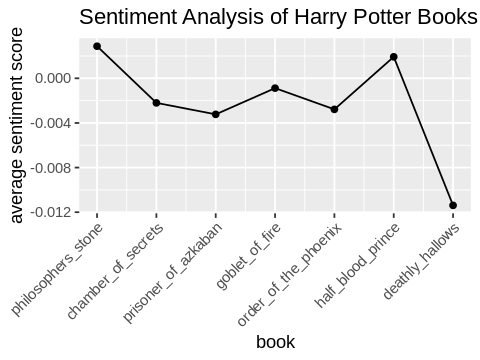

In [7]:
### YOUR SOLUTION HERE
library(harrypotter)
book_sentiment <- function(book_text) {
  book_tbl <- tibble(text = book_text)
  book_tok <- unnest_tokens(book_tbl, input = text, output = word)
  book_sentiment <- book_tok %>%
    left_join(afinn, by = "word") %>%
    replace_na(list(value = 0))
  average_sentiment <- mean(book_sentiment$value)
  return(average_sentiment)}
books <- list(
  philosophers_stone = philosophers_stone,
  chamber_of_secrets = chamber_of_secrets,
  prisoner_of_azkaban = prisoner_of_azkaban,
  goblet_of_fire = goblet_of_fire,
  order_of_the_phoenix = order_of_the_phoenix,
  half_blood_prince = half_blood_prince,
  deathly_hallows = deathly_hallows)
sentiment_scores <- sapply(books, book_sentiment)
book_titles <- names(sentiment_scores)
book_numbers <- 1:length(book_titles)

sentiment_plot <- ggplot(mapping = aes(x = book_numbers, y = sentiment_scores)) +
  geom_line() +
  geom_point() +
  scale_x_continuous(breaks = book_numbers, labels = book_titles) +
  labs(title = "Sentiment Analysis of Harry Potter Books",
       x = "book",
       y = "average sentiment score") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))
print(sentiment_plot)
#I think this opinion makes sense as the sentiment score are almost always negative 
#after the first one (except for the six one) and becomes really low at the last one 

**1(c)** According to the sentiment scores, what are the most negative and positive chapters in any of the Harry Potter books? (1 point)

In [8]:
### YOUR SOLUTION HERE
book_chapter_sentiment <- function(book_title, book_text) {
  book_tbl <- tibble(chapter = seq_along(book_text),
                     text = book_text,
                     title = book_title)
  book_tok <- unnest_tokens(book_tbl, input = text, output = word)
  book_sentiment <- book_tok %>%
    left_join(afinn, by = "word") %>%
    replace_na(list(value = 0))
  sentiment_summary <- book_sentiment %>%
    group_by(title, chapter) %>%
    summarize(average_sentiment = mean(value)) 
  return(sentiment_summary)}
  books <- list(
  philosophers_stone = philosophers_stone,
  chamber_of_secrets = chamber_of_secrets,
  prisoner_of_azkaban = prisoner_of_azkaban,
  goblet_of_fire = goblet_of_fire,
  order_of_the_phoenix = order_of_the_phoenix,
  half_blood_prince = half_blood_prince,
  deathly_hallows = deathly_hallows)
  sentiment_data <- bind_rows(lapply(names(books), function(book_title) {
  book_chapter_sentiment(book_title, books[[book_title]])}))
most_negative_chapter <- sentiment_data %>% arrange(average_sentiment) %>% head(1)
most_positive_chapter <- sentiment_data %>% arrange(desc(average_sentiment)) %>% head(1)
print(most_negative_chapter)
print(most_positive_chapter)

`summarise()` has grouped output by 'title'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'title'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'title'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'title'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'title'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'title'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'title'. You can override using the
`.groups` argument.


# A tibble: 1 × 3
# Groups:   title [1]
  title             chapter average_sentiment
  <chr>               <int>             <dbl>
1 half_blood_prince      28           -0.0645
# A tibble: 1 × 3
# Groups:   title [1]
  title             chapter average_sentiment
  <chr>               <int>             <dbl>
1 half_blood_prince       9            0.0357


**1(d)** Of the sentences that contain three or more scored words, what is the happiest (most positive)? (1 points)

In [11]:
### YOUR SOLUTION HERE
all_books_text <- c(philosophers_stone, chamber_of_secrets, prisoner_of_azkaban, 
                    goblet_of_fire, order_of_the_phoenix, half_blood_prince, 
                    deathly_hallows)
sentences_tbl <- tibble(text = all_books_text) %>%
  unnest_tokens(output = sentence, input = text, token = "sentences")
sentences_tbl <- sentences_tbl %>% mutate(sentence_id = row_number())
words_tbl <- unnest_tokens(sentences_tbl, input = sentence, output = word)
sentiment_tbl <- words_tbl %>%
  left_join(afinn, by = "word")
scored_sentences <- sentiment_tbl %>%
  group_by(sentence_id) %>%
  filter(sum(!is.na(value)) >= 3)
sentiment_summary <- scored_sentences %>%
  summarize(average_sentiment = mean(value, na.rm = TRUE))
happiest_sentence_id <- sentiment_summary %>% arrange(desc(average_sentiment)) %>% head(1) %>% pull(sentence_id)
happiest_sentence_text <- filter(sentences_tbl, sentence_id == happiest_sentence_id) %>% pull(sentence)
print(happiest_sentence_text)

[1] "maniacal laughter was ringing in his ears . . . he was happier than he had been in a very long time . . . jubilant, ecstatic, triumphant . . . a wonderful, wonderful thing had happened . . ."


## Problem 2: Reddit dataset (4 points)
The file `reddit_xmas_2017.RData` contains 100,000 comments posted to Reddit on Christmas Day, 2017. Unless specified otherwise, all matches are case insensitive.

In [63]:
load(url('https://datasets.stats306.org/reddit_xmas_2017.RData'))
reddit %>% print

# A tibble: 100,000 × 3
   author              body                                  created_utc        
   <chr>               <chr>                                 <dttm>             
 1 br_shadow           "Thank you for this, there is a pers… 2017-12-25 15:49:08
 2 Ksalol              "They are not to quick actually. It'… 2017-12-25 17:42:50
 3 itscool83           "tell her you guys should hang out w… 2017-12-25 18:54:13
 4 Glu7enFree          "Autism is a high honor in the tech … 2017-12-25 07:48:17
 5 Theotheogreato      "You thought a cat was your son?! "   2017-12-25 20:58:08
 6 Shadrac121          "Hopfully she takes wat people say i… 2017-12-25 22:27:31
 7 1fzUjhemoSB1QV7zI7  "Si ce propui sa facem cu toata piel… 2017-12-25 07:41:31
 8 MinisterOfEducation "I don't mean to be impolite, but if… 2017-12-25 19:28:35
 9 AabidS10            "i dont have a 720p x265 of it, sorr… 2017-12-25 13:20:32
10 S3RG10              "I'm dying to try Guatemalan sandals… 2017-12-25 00:48:46
# … 

Comment 174 wishes everyone a happy holidays:

In [13]:
reddit %>% slice(174)

author,body,created_utc
<chr>,<chr>,<dttm>
Bareilles,Thank you. Happy holidays everyone!,2017-12-25 01:33:50


**2(a)**  What are other people wishing? Count the first occurrence of the string "Happy `<word>`" or "Merry `<word>`" in the comment body, if any, count the matches. To keep things interesting, do *not* include phrases matching `(happy|merry) (to|with|for|about|and|that|if|i|you|when)`. 

Print a table containing the top 10 matches; a few of the rows are:

<table>
<thead>
    <tr><th scope="col">greeting</th><th scope="col">n</th></tr>
    <tr><th scope="col">&lt;chr&gt;</th><th scope="col">&lt;int&gt;</th></tr>
</thead>
<tbody>
    <tr><td>merry christmas</td><td>2040</td></tr>
    <tr><td>happy holidays </td><td> &mdash;</td></tr>
    <tr><td>&mdash;        </td><td> &mdash;</td></tr>
    <tr><td>&mdash;        </td><td> &mdash;</td></tr>
    <tr><td>&mdash;        </td><td> &mdash;</td></tr>
    <tr><td>&mdash;        </td><td> &mdash;</td></tr>
    <tr><td>&mdash;        </td><td> &mdash;</td></tr>
    <tr><td>&mdash;        </td><td> &mdash;</td></tr>
    <tr><td>&mdash;        </td><td>   7</td></tr>
    <tr><td>happy cakeday  </td><td>   6</td></tr>
</tbody>
</table>

Your numbers may vary slightly depending on how you performed the match.

In [22]:
### YOUR SOLUTION HERE
pattern <- "(?i)(?<!happy|merry)\\b(?:happy|merry)\\s+([a-z]+)\\b(?!\\s+(to|with|for|about|and|that|if|i|you|when))"
matches <- str_extract_all(tolower(reddit$body), pattern)
matches <- unlist(matches)
matches <- matches[matches != "happy" & matches != "merry"]  # Remove matches consisting only of "happy" or "merry"
counts <- table(matches)
top_matches <- head(sort(counts, decreasing = TRUE), 10)
print(top_matches)

matches
merry christmas  happy holidays        happy to      merry xmas      happy with 
           1687             465             109              85              58 
      happy new       happy and happy christmas      happy cake       happy for 
             41              40              36              29              24 


**2(b)** Find the number of times `christmas`or `xmas` mentioned each hour. Similarly, find the number of mentions per hour of `snow` or `flakes`. Draw a plot comparing these two time series. (1 point)

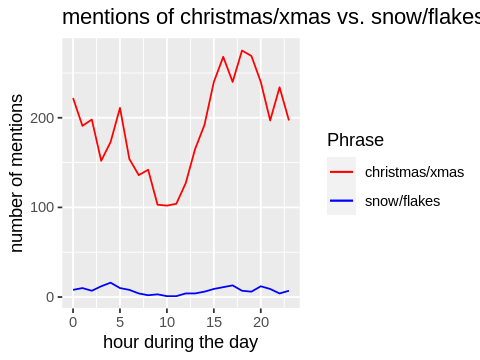

In [24]:
### YOUR SOLUTION HERE
reddit_df <- as.data.frame(reddit)
mentions_hourly <- reddit_df %>%
  mutate(hour = as.POSIXlt(created_utc)$hour) %>%
  group_by(hour) %>%
  summarize(christmas_xmas = sum(str_count(tolower(body), "\\b(christmas|xmas)\\b")),
            snow_flakes = sum(str_count(tolower(body), "\\b(snow|flakes)\\b")))
ggplot(mentions_hourly, aes(hour)) +
  geom_line(aes(y = christmas_xmas, color = "christmas/xmas")) +
  geom_line(aes(y = snow_flakes, color = "snow/flakes")) +
  scale_color_manual(values = c("red", "blue")) +
  labs(x = "hour during the day", y = "number of mentions", color = "Phrase") +
  ggtitle("mentions of christmas/xmas vs. snow/flakes per hour")

**2(c)** On Christmas Day, the word `christmas` occurs 4264 times. What is the next most common word after Christmas, and how many times does it appear? (1 point)

In [58]:
### YOUR SOLUTION HERE
comments <- str_to_lower(reddit$body)
comment_tibble <- tibble (comment = str_to_lower(reddit$body))%>%
  unnest_tokens(word,comment)%>%
  count(word, sort=TRUE)
comment_tibble %>% filter(n<4300)%>% head(5)
# The most common word after Christmas is "only"

word,n
<chr>,<int>
christmas,4259
only,4151
am,4017
then,3992
been,3929


**2(d)** Using `afinn` dataset, calculate the average sentiment scores of reddit comments for each hour. When is the most positive time in Christmas Day? (1 point)

In [70]:
load(url("https://datasets.stats306.org/afinn.RData"))
library(lubridate)
reddit %>%
  mutate(hour = hour(created_utc)) %>% 
  unnest_tokens(word, body) %>%
  inner_join(afinn, by=c("word"="word")) %>%
  group_by(hour) %>%
  summarise(score=mean(value)) %>%
  arrange(desc(score)) %>%
  head(1)
#The most positive time in Christmas Day is 4


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




hour,score
<int>,<dbl>
4,0.989179


## Challenge Problem: Text Ranking (2 points)
Not all terms/words are equally important, and some carry more information about contents. But how do we measure the importance? One popular method is using TF-IDF (term frequency–inverse document frequency). TF-IDF is a numerical statistic that is intended to reflect how important a word is to a document in a collection. Term Frequency measures the relative frequency of term within document. Inverse Document Frequency measures of how much information the word provides for the collection. 

We defined TF-IDF as:
$$\text{TF-IDF} = \operatorname{TF}(t,d) \times \operatorname{IDF}(t)$$
$$\operatorname{TF}(t, d) = \log(1+c(t,d))$$
$$\operatorname{IDF}(t) = 1 + \log(N/k)$$
where $c(t,d)$ is the frequency count of term $t$ in document $d$, $N$ is the total number of documents in the collection, $k$ is the number
of documents containing term $t$


**(a)** Consider the Harry Potter series as a collection of documents(books), find top 5 words in each book ranked by TF-IDF. Comment on your finding. (1 point) 

_Hint_: You can either compute this by hand, using the definitions shown above, or employ built-in functions in the `tidytext` package.

In [55]:
library(tidyverse)
library(tidytext)
library(harrypotter)
books <- list(
  philosophers_stone = philosophers_stone,
  chamber_of_secrets = chamber_of_secrets,
  prisoner_of_azkaban = prisoner_of_azkaban,
  goblet_of_fire = goblet_of_fire,
  order_of_the_phoenix = order_of_the_phoenix,
  half_blood_prince = half_blood_prince,
  deathly_hallows = deathly_hallows)
books_tbl <- tibble(
  title = names(books),
  text = books) %>% unnest(text)
words_tbl <- unnest_tokens(books_tbl, input = text, output = word)

tf_idf_tbl <- words_tbl %>%
  count(title, word) %>%
  bind_tf_idf(word, title, n)
top_words_per_book <- tf_idf_tbl %>%
  group_by(title) %>%
  top_n(5, tf_idf) %>%
  arrange(title, desc(tf_idf))
print(top_words_per_book)

# A tibble: 35 × 6
# Groups:   title [7]
   title              word            n       tf   idf   tf_idf
   <chr>              <chr>       <int>    <dbl> <dbl>    <dbl>
 1 chamber_of_secrets lockhart      197 0.00231  0.560 0.00129 
 2 chamber_of_secrets gilderoy       38 0.000445 1.25  0.000557
 3 chamber_of_secrets dobby         139 0.00163  0.336 0.000548
 4 chamber_of_secrets myrtle         47 0.000550 0.847 0.000466
 5 chamber_of_secrets riddle        101 0.00118  0.336 0.000398
 6 deathly_hallows    c            1300 0.00654  0.336 0.00220 
 7 deathly_hallows    xenophilius    79 0.000397 1.95  0.000773
 8 deathly_hallows    griphook      117 0.000588 1.25  0.000737
 9 deathly_hallows    hallows        67 0.000337 1.95  0.000655
10 deathly_hallows    horcrux        93 0.000468 1.25  0.000586
# … with 25 more rows


**(b)** Stop words are a set of commonly used words in a language like "the", "of", "and", "to", "a". The `stop_words` table contains a list of such words. If you ignore all the words in `stop_words`, what are the top 10 words (again ranked by TF-IDF) in each Harry Potter book? (1 point)

_Hint_: use `anti_join` to exclude words in `stop_words`.

In [56]:
### YOUR SOLUTION HERE
books <- list(
  philosophers_stone = philosophers_stone,
  chamber_of_secrets = chamber_of_secrets,
  prisoner_of_azkaban = prisoner_of_azkaban,
  goblet_of_fire = goblet_of_fire,
  order_of_the_phoenix = order_of_the_phoenix,
  half_blood_prince = half_blood_prince,
  deathly_hallows = deathly_hallows)
books_tbl <- tibble(
  title = names(books),
  text = books) %>% unnest(text)
words_tbl <- unnest_tokens(books_tbl, input = text, output = word)
filtered_words_tbl <- words_tbl %>% 
  anti_join(stop_words, by = "word")
tf_idf_tbl <- filtered_words_tbl %>%
  count(title, word) %>%
  bind_tf_idf(word, title, n)
top_words_per_book <- tf_idf_tbl %>%
  group_by(title) %>%
  top_n(5, tf_idf) %>%
  arrange(title, desc(tf_idf))
print(top_words_per_book)

# A tibble: 35 × 6
# Groups:   title [7]
   title              word            n       tf   idf  tf_idf
   <chr>              <chr>       <int>    <dbl> <dbl>   <dbl>
 1 chamber_of_secrets lockhart      197 0.00586  0.560 0.00328
 2 chamber_of_secrets gilderoy       38 0.00113  1.25  0.00142
 3 chamber_of_secrets dobby         139 0.00413  0.336 0.00139
 4 chamber_of_secrets myrtle         47 0.00140  0.847 0.00118
 5 chamber_of_secrets riddle        101 0.00300  0.336 0.00101
 6 deathly_hallows    xenophilius    79 0.00108  1.95  0.00209
 7 deathly_hallows    griphook      117 0.00159  1.25  0.00200
 8 deathly_hallows    hallows        67 0.000913 1.95  0.00178
 9 deathly_hallows    horcrux        93 0.00127  1.25  0.00159
10 deathly_hallows    luna          120 0.00163  0.847 0.00139
# … with 25 more rows
